In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import getpass  # to get the password without showing the input
password = getpass.getpass()

connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

········


In [2]:
query='''SELECT customer_table.customer_id, city, category, number_of_films_rented, total_money_spent, table_query4.films_rented_may_2005, table_query5.question
FROM query1 as table_query1 
LEFT JOIN query2 as table_query2 on table_query1.customer_id = table_query2.customer_id
LEFT JOIN query3 as table_query3 on table_query1.customer_id = table_query3.customer_id
LEFT JOIN query4 as table_query4 on table_query1.customer_id = table_query4.customer_id
LEFT JOIN query5 as table_query5 on table_query1.customer_id = table_query5.customer_id
LEFT JOIN sakila.customer as customer_table on table_query1.customer_id = customer_table.customer_id 
LEFT JOIN sakila.address as address_table on customer_table.address_id = address_table.address_id
LEFT JOIN sakila.city as city_table on address_table.city_id = city_table.city_id
;'''

data=pd.read_sql_query(query,engine)
data

,customer_id,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
0,1,Sasebo,Classics,1024,3797.76,64.0,YES
1,2,San Bernardino,Sports,729,3475.71,27.0,YES
2,3,Athenai,Action,676,3529.24,52.0,YES
3,4,Myingyan,Horror,484,1799.16,NaN,YES
4,5,Nantou,Classics,1444,5495.56,114.0,YES
...,...,...,...,...,...,...,...
594,595,Jinzhou,Documentary,900,3531.00,30.0,YES
595,596,Patras,Sports,784,2708.16,168.0,YES
596,597,Sullana,Foreign,625,2493.75,50.0,YES
597,598,Lausanne,Comedy,484,1843.16,NaN,YES


In [3]:
data.isna().sum()

customer_id                0
city                       0
category                   0
number_of_films_rented     0
total_money_spent          0
films_rented_may_2005     79
question                   9
dtype: int64

In [4]:
data=data.set_index('customer_id')
data

,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
customer_id,,,,,,
1,Sasebo,Classics,1024,3797.76,64.0,YES
2,San Bernardino,Sports,729,3475.71,27.0,YES
3,Athenai,Action,676,3529.24,52.0,YES
4,Myingyan,Horror,484,1799.16,NaN,YES
5,Nantou,Classics,1444,5495.56,114.0,YES
...,...,...,...,...,...,...
595,Jinzhou,Documentary,900,3531.00,30.0,YES
596,Patras,Sports,784,2708.16,168.0,YES
597,Sullana,Foreign,625,2493.75,50.0,YES


In [5]:
data["question"].fillna("NO", inplace=True)

In [6]:
data["films_rented_may_2005"].fillna('0', inplace=True)

In [7]:
data.isna().sum()

city                      0
category                  0
number_of_films_rented    0
total_money_spent         0
films_rented_may_2005     0
question                  0
dtype: int64

In [8]:
data

,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
customer_id,,,,,,
1,Sasebo,Classics,1024,3797.76,64,YES
2,San Bernardino,Sports,729,3475.71,27,YES
3,Athenai,Action,676,3529.24,52,YES
4,Myingyan,Horror,484,1799.16,0,YES
5,Nantou,Classics,1444,5495.56,114,YES
...,...,...,...,...,...,...
595,Jinzhou,Documentary,900,3531.00,30,YES
596,Patras,Sports,784,2708.16,168,YES
597,Sullana,Foreign,625,2493.75,50,YES


In [9]:
data.dtypes

city                       object
category                   object
number_of_films_rented      int64
total_money_spent         float64
films_rented_may_2005      object
question                   object
dtype: object

In [10]:
data['films_rented_may_2005'] = data['films_rented_may_2005'].apply(lambda x: int((float(x))))
data

,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
customer_id,,,,,,
1,Sasebo,Classics,1024,3797.76,64,YES
2,San Bernardino,Sports,729,3475.71,27,YES
3,Athenai,Action,676,3529.24,52,YES
4,Myingyan,Horror,484,1799.16,0,YES
5,Nantou,Classics,1444,5495.56,114,YES
...,...,...,...,...,...,...
595,Jinzhou,Documentary,900,3531.00,30,YES
596,Patras,Sports,784,2708.16,168,YES
597,Sullana,Foreign,625,2493.75,50,YES


In [11]:
data.describe()

,number_of_films_rented,total_money_spent,films_rented_may_2005
count,599.000000,599.000000,599.000000
mean,743.751252,3127.400551,53.287145
std,283.263760,1274.903607,43.397876
min,144.000000,634.560000,0.000000
25%,529.000000,2232.700000,25.000000
50%,676.000000,2943.750000,46.000000
75%,900.000000,3800.580000,70.000000
max,2116.000000,9969.750000,320.000000


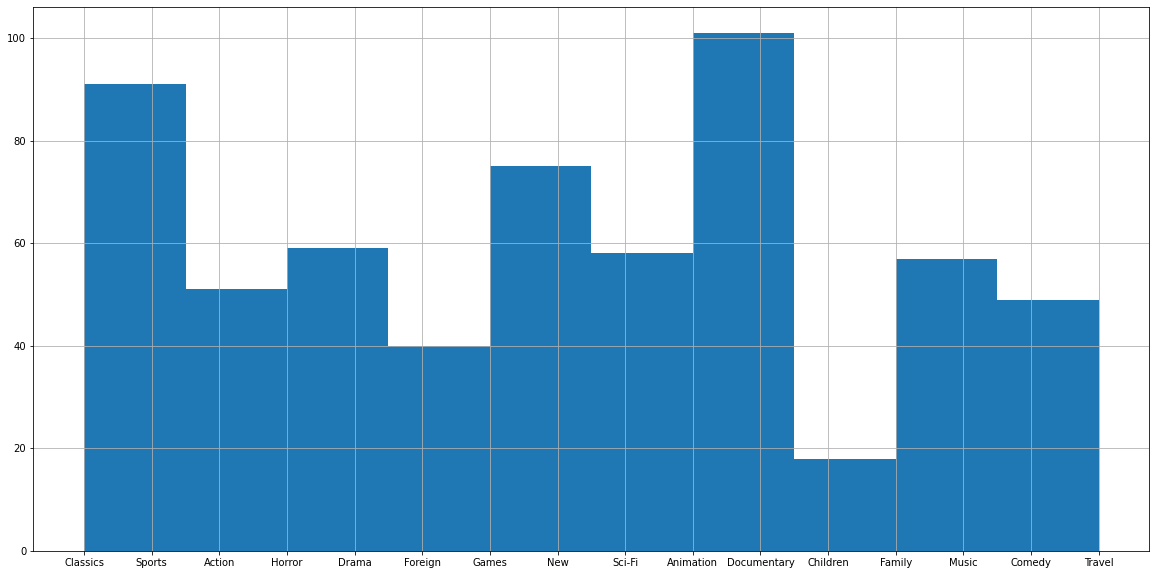

In [12]:
plt.figure(figsize=(20,10))
data['category'].hist()
plt.show()


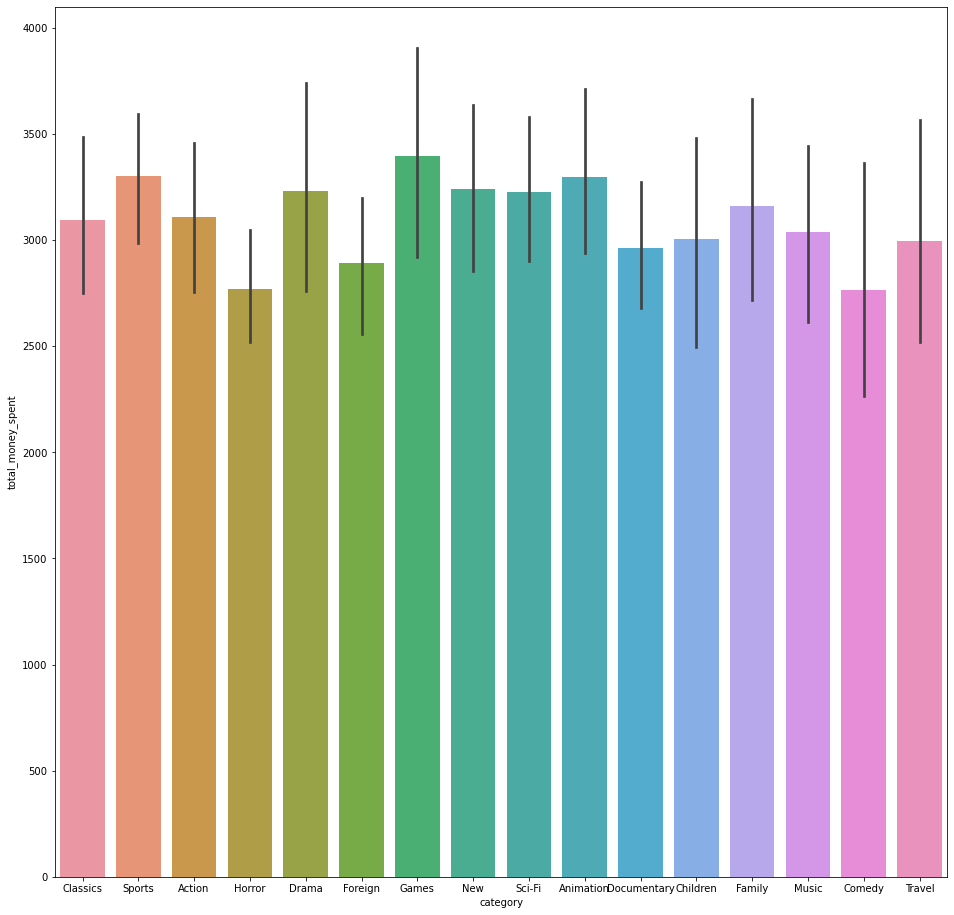

In [13]:
plt.figure(figsize=(16,16))
sns.barplot(x="category", y="total_money_spent", data=data)
plt.show()

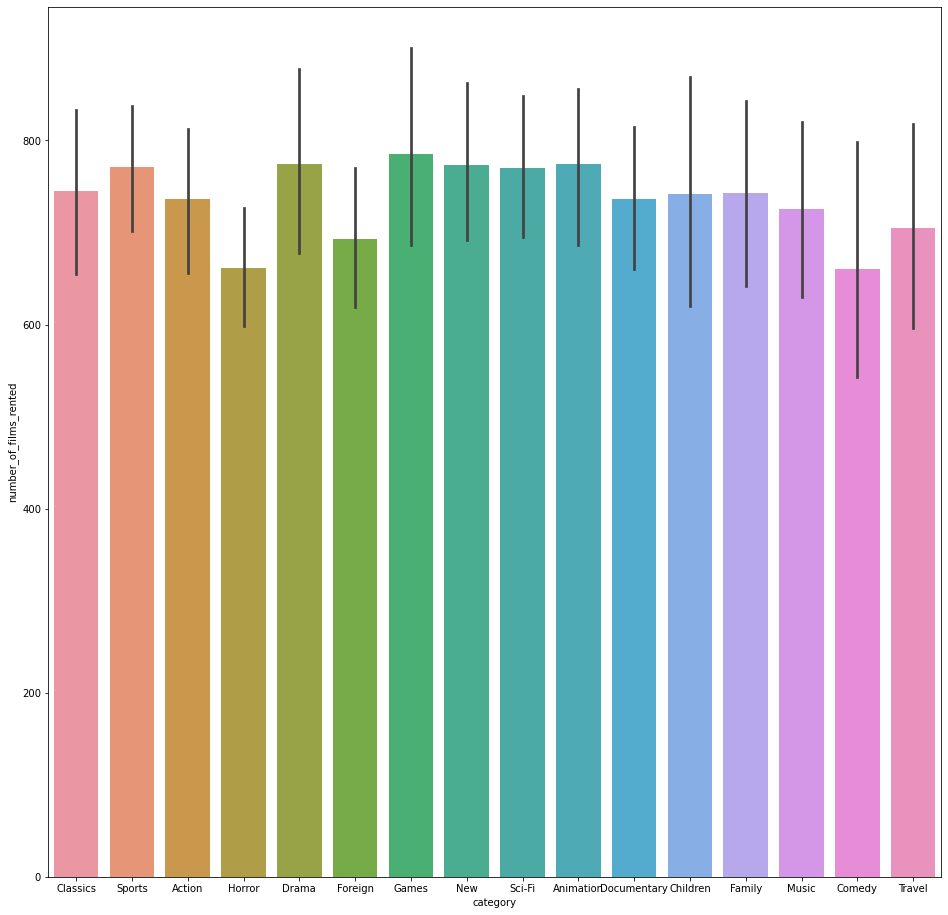

In [14]:
plt.figure(figsize=(16,16))
sns.barplot(x="category", y="number_of_films_rented", data=data)
plt.show()

In [15]:
data["category"].value_counts()

Sports         58
Animation      58
Sci-Fi         58
Action         51
Documentary    43
Foreign        40
New            38
Games          37
Family         35
Classics       33
Drama          32
Horror         27
Comedy         25
Travel         24
Music          22
Children       18
Name: category, dtype: int64

In [16]:
data=pd.get_dummies(data,columns=['question'])

In [17]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE()

X = data.drop(columns=['category','city'])
y = data['category']

X, y = smote.fit_resample(X, y)
y.value_counts()

Action         58
Travel         58
New            58
Horror         58
Animation      58
Family         58
Foreign        58
Drama          58
Sports         58
Comedy         58
Documentary    58
Sci-Fi         58
Classics       58
Children       58
Games          58
Music          58
Name: category, dtype: int64

In [29]:
X

,number_of_films_rented,total_money_spent,films_rented_may_2005,question_NO,question_YES
0,1024,3797.760000,64,0,1
1,729,3475.710000,27,0,1
2,676,3529.240000,52,0,1
3,484,1799.160000,0,0,1
4,1444,5495.560000,114,0,1
...,...,...,...,...,...
923,441,1931.209478,62,0,1
924,763,3025.667499,72,0,1
925,729,3218.134406,39,0,1
926,862,4048.568357,58,0,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
classification = LogisticRegression(random_state=42, multi_class='multinomial', max_iter=10000) # max_iter
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

In [32]:
classification.score(X_test, y_test)

0.06451612903225806

In [33]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[0, 1, 2, 0, 3, 1, 0, 2, 2, 3, 0, 0, 0, 2, 0, 0],
       [0, 0, 5, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 5, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0],
       [0, 0, 3, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0],
       [0, 0, 4, 0, 1, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 6, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 1, 1, 0, 2, 0, 0],
       [0, 0, 4, 0, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 3, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 4, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 4, 0, 3, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0],
       [0, 1, 4, 0, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 3, 1, 0, 4, 0, 3, 0, 1, 0, 3, 0, 0],
       [0, 1, 3, 0, 4, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [34]:
pd.Series(predictions).value_counts()

Children       55
Comedy         35
Family         18
Documentary    18
Games          18
Sci-Fi         14
Animation       8
Music           8
Drama           7
Foreign         2
Horror          2
Travel          1
dtype: int64

In [35]:
y_test.value_counts()

Action         16
New            16
Sports         16
Drama          14
Classics       13
Foreign        12
Documentary    12
Travel         11
Horror         11
Sci-Fi         11
Family         10
Comedy         10
Animation      10
Games          10
Music          10
Children        4
Name: category, dtype: int64

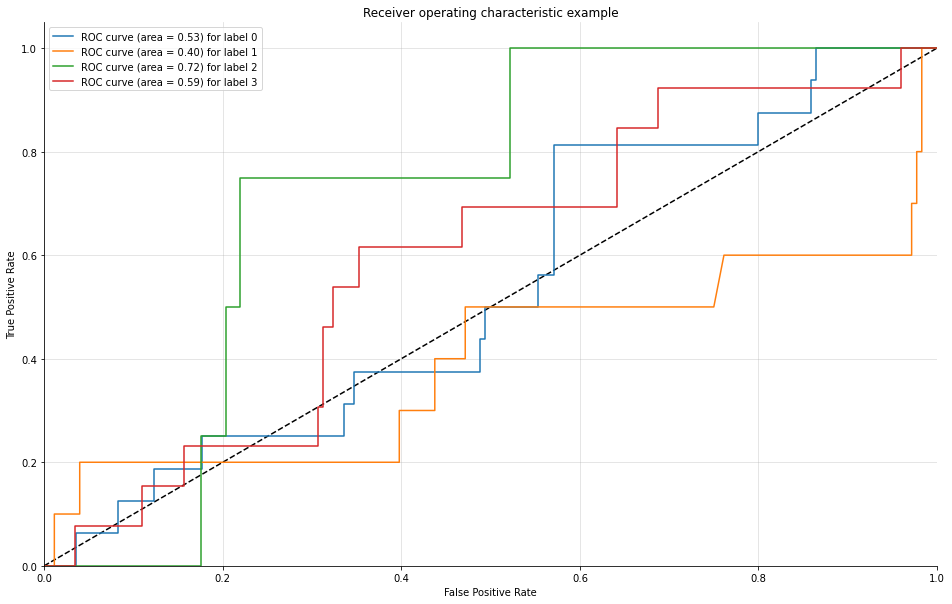

In [36]:
from sklearn import metrics

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(classification, X_test, y_test, n_classes=4, figsize=(16, 10))

In [37]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Action       0.00      0.00      0.00        16
   Animation       0.00      0.00      0.00        10
    Children       0.04      0.50      0.07         4
    Classics       0.00      0.00      0.00        13
      Comedy       0.09      0.30      0.13        10
 Documentary       0.28      0.42      0.33        12
       Drama       0.14      0.07      0.10        14
      Family       0.00      0.00      0.00        10
     Foreign       0.00      0.00      0.00        12
       Games       0.06      0.10      0.07        10
      Horror       0.00      0.00      0.00        11
       Music       0.00      0.00      0.00        10
         New       0.00      0.00      0.00        16
      Sci-Fi       0.00      0.00      0.00        11
      Sports       0.00      0.00      0.00        16
      Travel       0.00      0.00      0.00        11

    accuracy                           0.06       186
   macro avg       0.04   

C:\Users\loret\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\loret\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\loret\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusions
 Not that good uh? Our model 'stinks' when trying to predict which categroy is going to be rented. Why? Probably it is because we do not have the proper data to work with.

As we mentioned at some point, we will have to work with time-series data in order to get a more accurate result. 

Also, we have to take into account that, when writing our query, the most seen categroy was selected 'randomly' by SQL through those which where a tie. Therefore, where we have 'Sport' as the preferred category, might happen that 'Classics' and 'Animation' have been rented the same amount of times as 'Sport'